In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text
import random

In [16]:
df = pd.read_csv('result_rf.csv').dropna()

In [17]:
df

,Unnamed: 0,V1,Accuracy,LogFC
0,1,1007_s_at,0.79,-1.216688
1,2,1053_at,0.75,-1.226637
2,3,117_at,0.87,-3.093048
3,4,121_at,0.79,-0.584260
4,5,1255_g_at,0.90,0.740528
...,...,...,...,...
54670,54671,AFFX-ThrX-5_at,0.92,-0.058453
54671,54672,AFFX-ThrX-M_at,0.92,-0.099028
54672,54673,AFFX-TrpnX-3_at,0.93,0.001017
54673,54674,AFFX-TrpnX-5_at,0.93,0.001325


In [18]:
# for i in range(len(df['Accuracy'])):
#     df['Accuracy'][i] = df['Accuracy'][i] + random.randint(1,10) / 1000

df['Accuracy'] = [x+random.randint(1,10)/1000 for x in df['Accuracy']]
df['Accuracy']

0        0.798
1        0.757
2        0.876
3        0.795
4        0.910
         ...  
54670    0.921
54671    0.926
54672    0.939
54673    0.938
54674    0.937
Name: Accuracy, Length: 54675, dtype: float64

In [19]:
df['Status'] = ['Up-regulated' if x > 1 and y>=0.85 else 'Down-regulated' if x < -1 and y>=0.85 else 'No-regulation' for y, x in zip(df['Accuracy'], df['LogFC'])]

In [20]:
# plt.figure(figsize = (6,6))


# ax = sns.scatterplot(data = df, x = 'LogFC', y = 'Accuracy', 
#                      hue = 'color', hue_order = ['Up-regulated','Down-regulated', 'No-regulation'],
#                     palette = ['#9E2A2B','#0D3B66', '#6A7B76'], s=10)
# ax.axvline(1, zorder = 1, c = 'k', lw = 2, ls = '--')
# ax.axhline(.85, zorder = 1, c = 'k', lw = 2, ls = '--')
# ax.axvline(-1, zorder = 1, c = 'k', lw = 2, ls = '--')
# plt.savefig("results_svm_sm.jpeg")

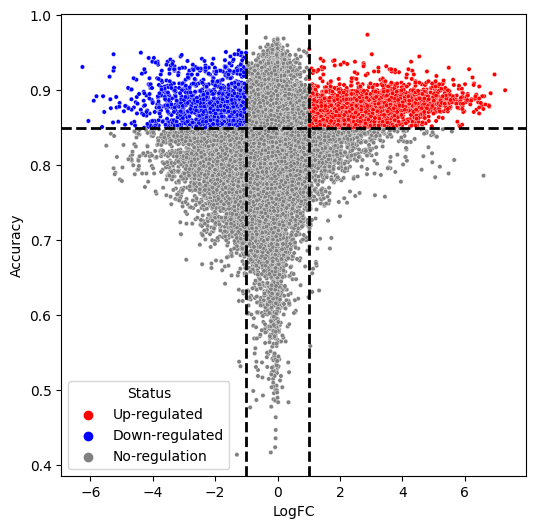

In [21]:
plt.figure(figsize = (6,6))

colors = {'Up-regulated': 'red', 'Down-regulated': 'blue', 'No-regulation': 'gray'}
ax = sns.scatterplot(data = df, x = 'LogFC', y = 'Accuracy', 
                     hue = 'Status', hue_order = ['Up-regulated','Down-regulated', 'No-regulation'],
                    palette = colors, s=10)
ax.axvline(1, zorder = 1, c = 'k', lw = 2, ls = '--')
ax.axhline(.85, zorder = 1, c = 'k', lw = 2, ls = '--')
ax.axvline(-1, zorder = 1, c = 'k', lw = 2, ls = '--')
plt.savefig("results_rf_sm.jpeg")